In [135]:
import pandas as pd
import random
random.seed(0)

df = pd.read_csv("Covid Dataset.csv")
df = df[['Fever', 'Wearing Masks', 'Sore throat', 'Visited Public Exposed Places', 'Running Nose', 'COVID-19']]

In [136]:
# group activity
# given a sample small dataset
# try to get a higher accuracy by building a decision tree with hard-code if-then-else rules

small_train_dataset = pd.concat([
    df[df['COVID-19'] == 'Yes'].sample(10, random_state=0),
    df[df['COVID-19'] == 'No'].sample(10, random_state=0)
])
small_train_gt = small_train_dataset["COVID-19"]
rest_df = df.drop(index=small_train_dataset.index)

small_test_dataset = pd.concat([
    rest_df[rest_df['COVID-19'] == 'Yes'].sample(10, random_state=0),
    rest_df[rest_df['COVID-19'] == 'No'].sample(10, random_state=0)
])
small_test_gt = small_test_dataset['COVID-19']
small_test_dataset = small_test_dataset.drop(columns=['COVID-19'])
rest_df = rest_df.drop(index=small_test_dataset.index)

large_test_dataset = rest_df.sample(1000, random_state=0)
large_test_gt = large_test_dataset['COVID-19']
large_test_dataset = large_test_dataset.drop(columns=['COVID-19'])
rest_df = rest_df.drop(index=large_test_dataset.index)

large_train_dataset = rest_df.sample(3000, random_state=0)

# you can see all data in train dataset but not test dataset
small_train_dataset

,Fever,Wearing Masks,Sore throat,Visited Public Exposed Places,Running Nose,COVID-19
965,Yes,No,Yes,No,Yes,Yes
2776,No,No,Yes,Yes,No,Yes
1334,Yes,No,Yes,Yes,No,Yes
3561,Yes,No,Yes,No,No,Yes
1248,Yes,No,Yes,Yes,Yes,Yes
3320,Yes,No,No,Yes,No,Yes
2339,Yes,No,Yes,Yes,Yes,Yes
2016,Yes,No,Yes,No,No,Yes
154,Yes,No,Yes,Yes,No,Yes
3944,No,No,Yes,Yes,Yes,Yes


In [137]:
def model(sample):
    # modify this function to build your own decision tree
    if sample['Running Nose'] == 'Yes':
        return 'Yes'
    else:
        return 'No'

def evaluate(dataset, gt, model):
    right = 0
    for index, sample in dataset.iterrows():
        right += model(sample) == gt[index]
    return right / len(gt)

# run to get accuracy
print("train accuracy:", evaluate(small_train_dataset, small_train_gt, model))
print("small test accuracy:", evaluate(small_test_dataset, small_test_gt, model))
print("large test accuracy:", evaluate(large_test_dataset, large_test_gt, model))

train accuracy: 0.35
small test accuracy: 0.55
large test accuracy: 0.515


In [138]:
labels = ("Yes", "No")

def get_gini_impurity(df, feature_key, class_key):
    ginis = []
    cnts = []
    results = [feature_key]
    for feature_label in labels:
        sub_df = df[df[feature_key] == feature_label]
        label_cnts = [len(sub_df[sub_df[class_key] == class_label])
        for class_label in labels]
        results.append((feature_label, label_cnts))
        label_cnt_sum = sum(label_cnts)
        if label_cnt_sum == 0:
            gini = 1
        else:
            gini = 1 - sum((label_cnt / label_cnt_sum) * (label_cnt / label_cnt_sum)
                       for label_cnt in label_cnts)
        ginis.append(gini)
        results.append(gini)
        cnts.append(label_cnt_sum)
    cnt_sum = sum(cnts)
    total_gini = sum(gini * cnt / cnt_sum for gini, cnt in zip(ginis, cnts))
    results.append(total_gini)
    return results

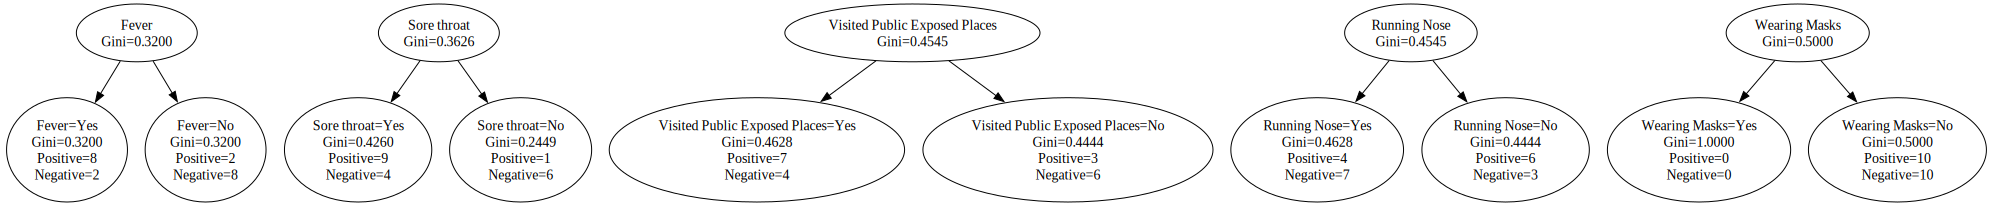

In [139]:
import graphviz

all_ginis = [get_gini_impurity(small_train_dataset, column, "COVID-19")
             for column in small_train_dataset.columns if column != "COVID-19"]
all_ginis = sorted(all_ginis, key=lambda x:x[5])


dot = graphviz.Digraph()
for item in all_ginis:
    root = "{}\nGini={:.4f}".format(item[0], item[5])
    left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
    right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])
    dot.node(root)
    dot.node(left)
    dot.node(right)
    dot.edge(root, left)
    dot.edge(root, right)
dot

Fever=Yes
['Sore throat', ('Yes', [7, 0]), 0.0, ('No', [1, 2]), 0.4444444444444444, 0.13333333333333333]
['Visited Public Exposed Places', ('Yes', [5, 0]), 0.0, ('No', [3, 2]), 0.48, 0.24]
['Running Nose', ('Yes', [3, 2]), 0.48, ('No', [5, 0]), 0.0, 0.24]
['Wearing Masks', ('Yes', [0, 0]), 1, ('No', [8, 2]), 0.31999999999999984, 0.31999999999999984]
Fever=No
['Sore throat', ('Yes', [2, 4]), 0.4444444444444444, ('No', [0, 4]), 0.0, 0.26666666666666666]
['Visited Public Exposed Places', ('Yes', [2, 4]), 0.4444444444444444, ('No', [0, 4]), 0.0, 0.26666666666666666]
['Running Nose', ('Yes', [1, 5]), 0.2777777777777777, ('No', [1, 3]), 0.375, 0.3166666666666666]
['Wearing Masks', ('Yes', [0, 0]), 1, ('No', [2, 8]), 0.31999999999999984, 0.31999999999999984]


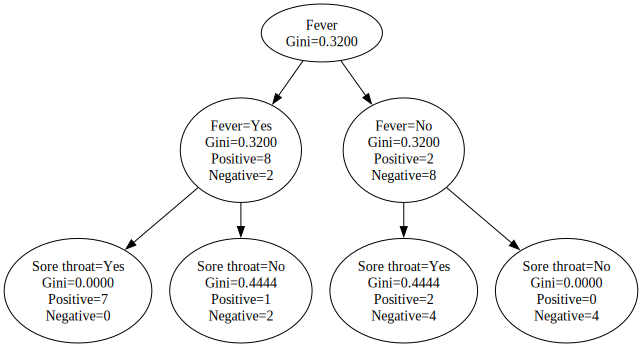

In [140]:
all_ginis = [get_gini_impurity(small_train_dataset, column, "COVID-19")
             for column in small_train_dataset.columns if column != "COVID-19"]
all_ginis = sorted(all_ginis, key=lambda x:x[5])

item = all_ginis[0]
dot = graphviz.Digraph()
root = "{}\nGini={:.4f}".format(item[0], item[5])
left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])
filter_columns = ["COVID-19", "Fever"]
feature_key = "Fever"

local_df = small_train_dataset[small_train_dataset[feature_key] == "Yes"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in filter_columns]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
print("Fever=Yes")
for _ in all_ginis:
    print(_)
item = all_ginis[0]
left_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
left_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = small_train_dataset[small_train_dataset[feature_key] == "No"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in filter_columns]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
print("Fever=No")
for _ in all_ginis:
    print(_)
item = all_ginis[0]
right_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

dot.node(root)
dot.node(left)
dot.node(right)
dot.node(left_left)
dot.node(left_right)
dot.node(right_left)
dot.node(right_right)

dot.edge(root, left)
dot.edge(root, right)
dot.edge(left, left_left)
dot.edge(left, left_right)
dot.edge(right, right_left)
dot.edge(right, right_right)

dot

# We found some nodes with Gini=0, it means these branches does not need to move further.

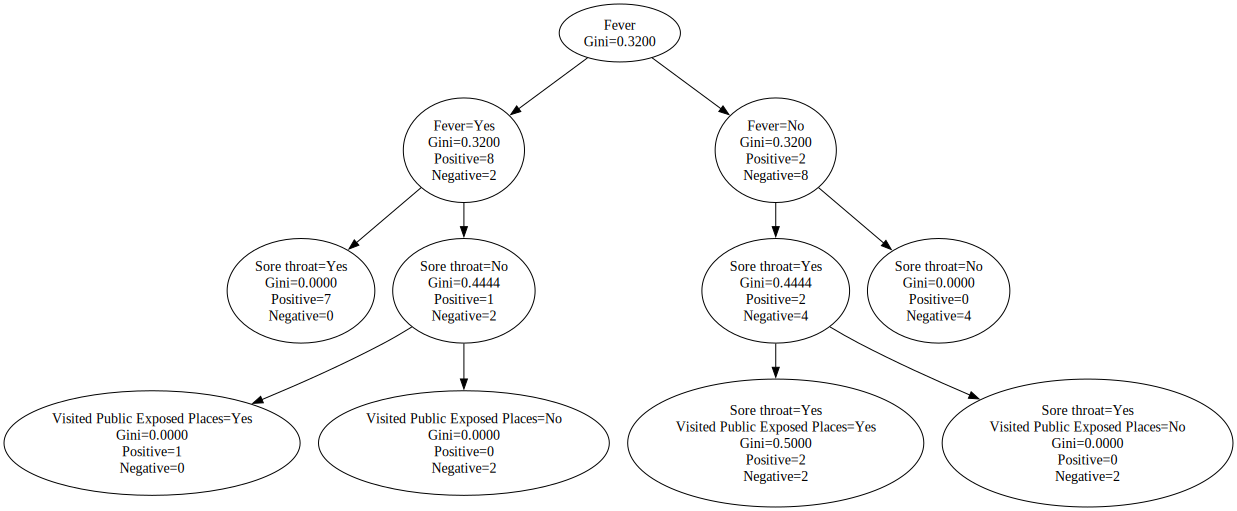

In [141]:
all_ginis = [get_gini_impurity(small_train_dataset, column, "COVID-19")
             for column in small_train_dataset.columns if column != "COVID-19"]
all_ginis = sorted(all_ginis, key=lambda x:x[5])

item = all_ginis[0]
dot = graphviz.Digraph()
root = "{}\nGini={:.4f}".format(item[0], item[5])
left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = small_train_dataset[small_train_dataset["Fever"] == "Yes"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
left_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
left_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = local_df[local_df["Sore throat"] == "No"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever", "Sore throat"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
left_right_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
left_right_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = small_train_dataset[small_train_dataset["Fever"] == "No"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
right_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = local_df[local_df["Sore throat"] == "Yes"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever", "Sore throat"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
right_left_left = "Sore throat=Yes\n{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right_left_right = "Sore throat=Yes\n{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

dot.node(root)
dot.node(left)
dot.node(right)
dot.node(left_left)
dot.node(left_right)
dot.node(right_left)
dot.node(right_right)
dot.node(left_right_left)
dot.node(left_right_right)
dot.node(right_left_left)
dot.node(right_left_right)

dot.edge(root, left)
dot.edge(root, right)
dot.edge(left, left_left)
dot.edge(left, left_right)
dot.edge(right, right_left)
dot.edge(right, right_right)
dot.edge(left_right, left_right_left)
dot.edge(left_right, left_right_right)
dot.edge(right_left, right_left_left)
dot.edge(right_left, right_left_right)

dot

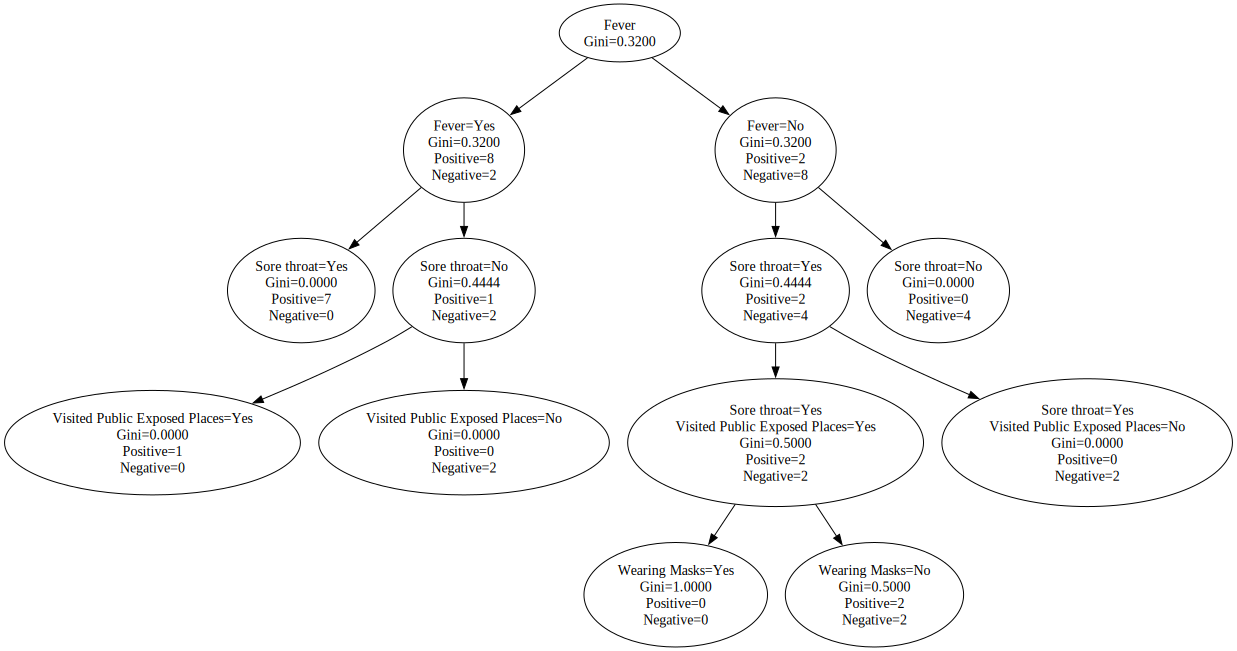

In [142]:
all_ginis = [get_gini_impurity(small_train_dataset, column, "COVID-19")
             for column in small_train_dataset.columns if column != "COVID-19"]
all_ginis = sorted(all_ginis, key=lambda x:x[5])

item = all_ginis[0]
dot = graphviz.Digraph()
root = "{}\nGini={:.4f}".format(item[0], item[5])
left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = small_train_dataset[small_train_dataset["Fever"] == "Yes"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
left_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
left_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = local_df[local_df["Sore throat"] == "No"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever", "Sore throat"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
left_right_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
left_right_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = small_train_dataset[small_train_dataset["Fever"] == "No"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
right_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = local_df[local_df["Sore throat"] == "Yes"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever", "Sore throat"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
right_left_left = "Sore throat=Yes\n{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right_left_right = "Sore throat=Yes\n{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = local_df[local_df["Visited Public Exposed Places"] == "Yes"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever", "Sore throat", "Visited Public Exposed Places"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
right_left_left_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right_left_left_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

dot.node(root)
dot.node(left)
dot.node(right)
dot.node(left_left)
dot.node(left_right)
dot.node(right_left)
dot.node(right_right)
dot.node(left_right_left)
dot.node(left_right_right)
dot.node(right_left_left)
dot.node(right_left_right)
dot.node(right_left_left_left)
dot.node(right_left_left_right)

dot.edge(root, left)
dot.edge(root, right)
dot.edge(left, left_left)
dot.edge(left, left_right)
dot.edge(right, right_left)
dot.edge(right, right_right)
dot.edge(left_right, left_right_left)
dot.edge(left_right, left_right_right)
dot.edge(right_left, right_left_left)
dot.edge(right_left, right_left_right)
dot.edge(right_left_left, right_left_left_left)
dot.edge(right_left_left, right_left_left_right)

dot


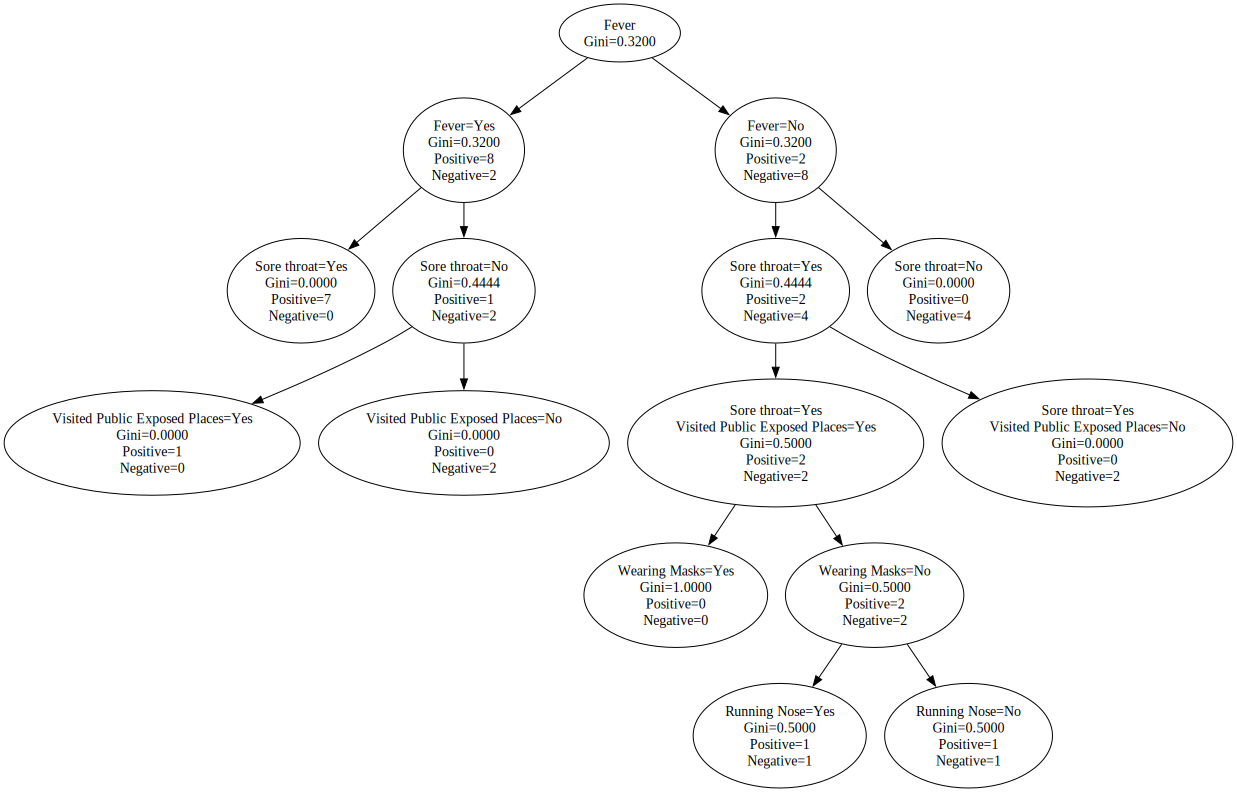

In [143]:
all_ginis = [get_gini_impurity(small_train_dataset, column, "COVID-19")
             for column in small_train_dataset.columns if column != "COVID-19"]
all_ginis = sorted(all_ginis, key=lambda x:x[5])

item = all_ginis[0]
dot = graphviz.Digraph()
root = "{}\nGini={:.4f}".format(item[0], item[5])
left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = small_train_dataset[small_train_dataset["Fever"] == "Yes"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
left_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
left_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = local_df[local_df["Sore throat"] == "No"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever", "Sore throat"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
left_right_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
left_right_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = small_train_dataset[small_train_dataset["Fever"] == "No"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
right_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = local_df[local_df["Sore throat"] == "Yes"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever", "Sore throat"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
right_left_left = "Sore throat=Yes\n{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right_left_right = "Sore throat=Yes\n{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = local_df[local_df["Visited Public Exposed Places"] == "Yes"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever", "Sore throat", "Visited Public Exposed Places"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
right_left_left_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right_left_left_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

local_df = local_df[local_df["Wearing Masks"] == "No"]
all_ginis = [get_gini_impurity(local_df, column, "COVID-19")
        for column in local_df.columns if column not in ["COVID-19", "Fever", "Sore throat", "Visited Public Exposed Places", "Wearing Masks"]]
all_ginis = sorted(all_ginis, key=lambda x:x[5])
item = all_ginis[0]
right_left_left_right_left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
right_left_left_right_right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])

dot.node(root)
dot.node(left)
dot.node(right)
dot.node(left_left)
dot.node(left_right)
dot.node(right_left)
dot.node(right_right)
dot.node(left_right_left)
dot.node(left_right_right)
dot.node(right_left_left)
dot.node(right_left_right)
dot.node(right_left_left_left)
dot.node(right_left_left_right)
dot.node(right_left_left_right_left)
dot.node(right_left_left_right_right)

dot.edge(root, left)
dot.edge(root, right)
dot.edge(left, left_left)
dot.edge(left, left_right)
dot.edge(right, right_left)
dot.edge(right, right_right)
dot.edge(left_right, left_right_left)
dot.edge(left_right, left_right_right)
dot.edge(right_left, right_left_left)
dot.edge(right_left, right_left_right)
dot.edge(right_left_left, right_left_left_left)
dot.edge(right_left_left, right_left_left_right)
dot.edge(right_left_left_right, right_left_left_right_left)
dot.edge(right_left_left_right, right_left_left_right_right)


dot


In [144]:
def model(sample):
    # modify this function to build your own decision tree
    if sample['Fever'] == 'Yes':
        if sample['Sore throat'] == 'Yes':
            return 'Yes'
        else:
            if sample['Visited Public Exposed Places'] == 'Yes':
                return 'Yes'
            else:
                return 'No'
    else:
        if sample['Sore throat'] == 'Yes':
            if sample['Visited Public Exposed Places'] == 'Yes':
                if random.random() < 0.5:
                    return 'Yes'
                else:
                    return 'No'
                # return 'Yes'
                # return 'No'
            else:
                return 'No'
        else:
            return 'No'

def evaluate(dataset, gt, model):
    right = 0
    for index, sample in dataset.iterrows():
        right += model(sample) == gt[index]
    return right / len(gt)

# run to get accuracy
print("train accuracy:", evaluate(small_train_dataset, small_train_gt, model))
print("small test accuracy:", evaluate(small_test_dataset, small_test_gt, model))
print("large test accuracy:", evaluate(large_test_dataset, large_test_gt, model))

train accuracy: 0.8
small test accuracy: 0.75
large test accuracy: 0.805


small train accuracy: 0.9
small test accuracy: 0.75
large test accuracy: 0.789


/var/folders/_4/nh2v7vsj6dxgjzgdkc_krcnh0000gn/T/ipykernel_81746/3820836488.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  small_train_gt = small_train_dataset['COVID-19'].replace(['Yes', 'No'], [1, 0])
/var/folders/_4/nh2v7vsj6dxgjzgdkc_krcnh0000gn/T/ipykernel_81746/3820836488.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  small_train_dataset = small_train_dataset.replace(['Yes', 'No'], [1, 0])
/var/folders/_4/nh2v7vsj6dxgjzgdkc_krcnh0000gn/T/ipykernel_81746/3820836488.py:9: FutureWarning: Downcasting behavior in `repla

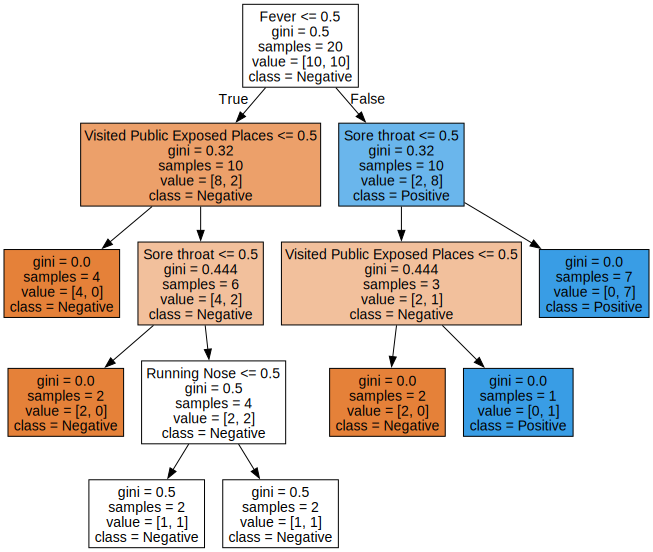

In [145]:
# check the answer by sklearn
# why is it a little different ?

from sklearn import tree

small_train_gt = small_train_dataset['COVID-19'].replace(['Yes', 'No'], [1, 0])
small_train_dataset = small_train_dataset.drop(columns=['COVID-19'])
small_train_dataset = small_train_dataset.replace(['Yes', 'No'], [1, 0])
small_test_dataset = small_test_dataset.replace(['Yes', 'No'], [1, 0])
small_test_gt = small_test_gt.replace(['Yes', 'No'], [1, 0])
large_test_dataset = large_test_dataset.replace(['Yes', 'No'], [1, 0])
large_test_gt = large_test_gt.replace(['Yes', 'No'], [1, 0])

# Max Depth None
DT = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)

DT.fit(small_train_dataset,small_train_gt)

print("small train accuracy:", DT.score(small_train_dataset, small_train_gt))
print("small test accuracy:", DT.score(small_test_dataset, small_test_gt))
print("large test accuracy:", DT.score(large_test_dataset, large_test_gt))

Target = ['Negative','Positive']

# DOT data
DTRep = tree.export_graphviz(DT, out_file=None, 
                                feature_names= small_train_dataset.columns,
                                class_names= Target,
                                filled=True)

# Draw graph
DTgraphmax = graphviz.Source(DTRep, format="png") 
DTgraphmax

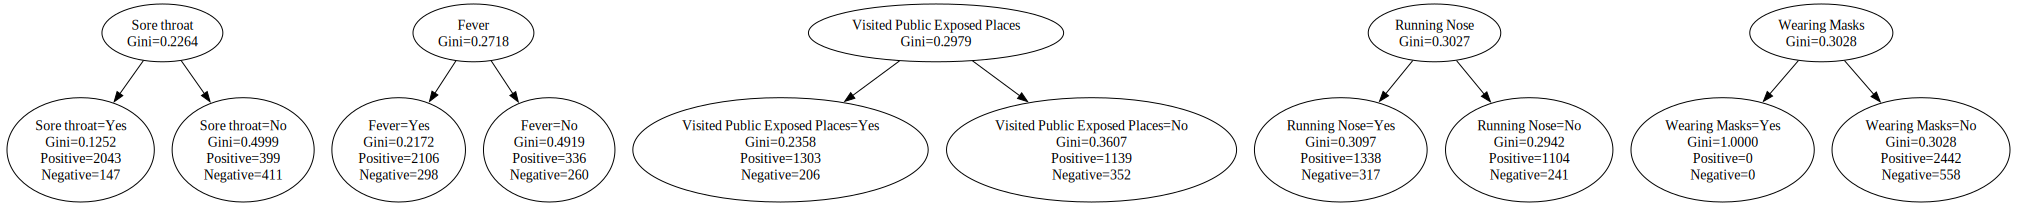

In [146]:
all_ginis = [get_gini_impurity(large_train_dataset, column, "COVID-19")
             for column in large_train_dataset.columns if column != "COVID-19"]
all_ginis = sorted(all_ginis, key=lambda x:x[5])


dot = graphviz.Digraph()
for item in all_ginis:
    root = "{}\nGini={:.4f}".format(item[0], item[5])
    left = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[1][0], item[2], item[1][1][0], item[1][1][1])
    right = "{}={}\nGini={:.4f}\nPositive={}\nNegative={}".format(item[0], item[3][0], item[4], item[3][1][0], item[3][1][1])
    dot.node(root)
    dot.node(left)
    dot.node(right)
    dot.edge(root, left)
    dot.edge(root, right)
dot

/var/folders/_4/nh2v7vsj6dxgjzgdkc_krcnh0000gn/T/ipykernel_81746/2032320188.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  large_train_gt = large_train_dataset['COVID-19'].replace(['Yes', 'No'], [1, 0])
/var/folders/_4/nh2v7vsj6dxgjzgdkc_krcnh0000gn/T/ipykernel_81746/2032320188.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  large_train_dataset = large_train_dataset.replace(['Yes', 'No'], [1, 0])


large train accuracy: 0.8513333333333334
large test accuracy: 0.848


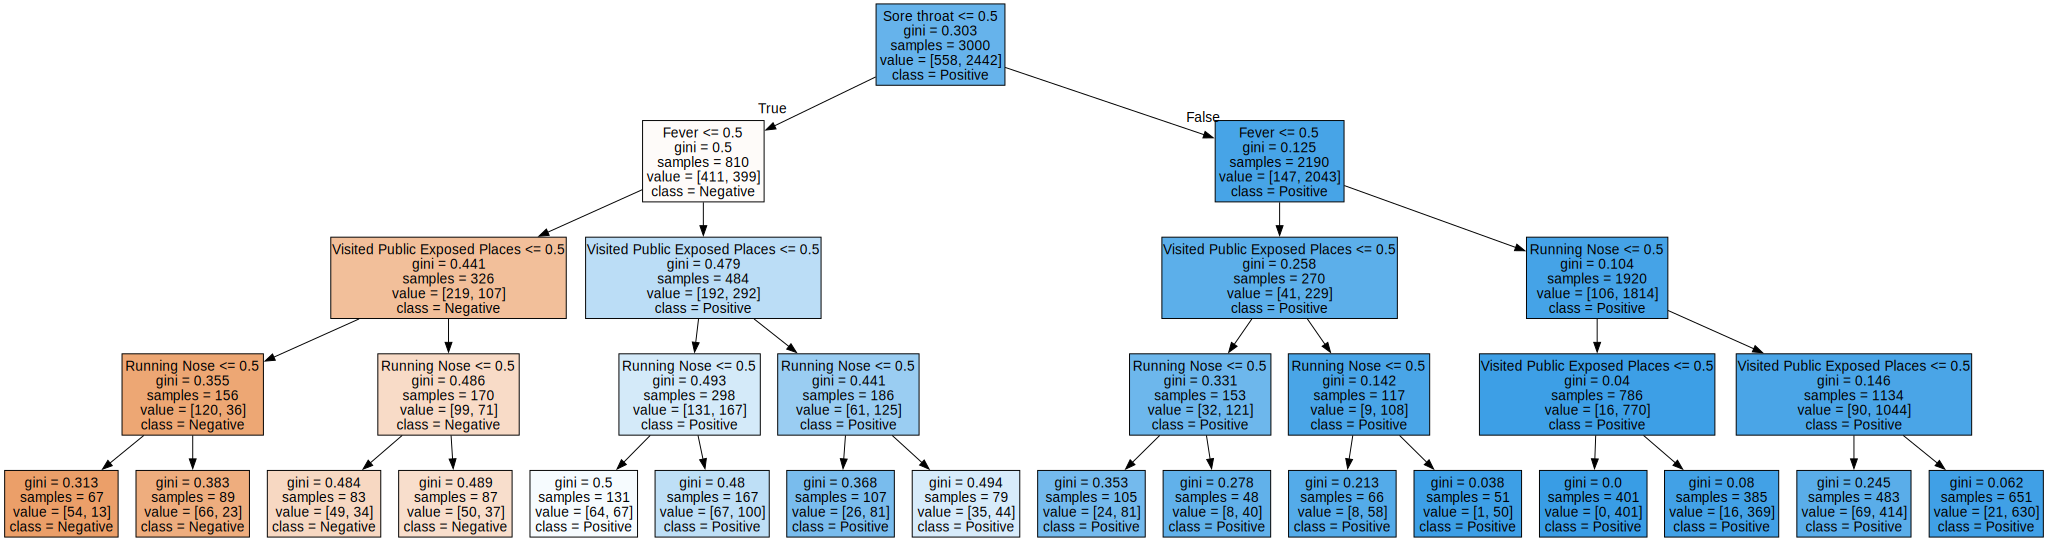

In [147]:
from sklearn import tree

large_train_gt = large_train_dataset['COVID-19'].replace(['Yes', 'No'], [1, 0])
large_train_dataset = large_train_dataset.drop(columns=['COVID-19'])
large_train_dataset = large_train_dataset.replace(['Yes', 'No'], [1, 0])

# Max Depth None
DT = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)

DT.fit(large_train_dataset,large_train_gt)

print("large train accuracy:", DT.score(large_train_dataset, large_train_gt))
print("large test accuracy:", DT.score(large_test_dataset, large_test_gt))

Target = ['Negative','Positive']

# DOT data
DTRep = tree.export_graphviz(DT, out_file=None, 
                                feature_names= large_train_dataset.columns,
                                class_names= Target,
                                filled=True)

# Draw graph
DTgraphmax = graphviz.Source(DTRep, format="png") 
DTgraphmax

21 Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')


/var/folders/_4/nh2v7vsj6dxgjzgdkc_krcnh0000gn/T/ipykernel_81746/2812729567.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  large_train_gt = large_train_dataset['COVID-19'].replace(['Yes', 'No'], [1, 0])
/var/folders/_4/nh2v7vsj6dxgjzgdkc_krcnh0000gn/T/ipykernel_81746/2812729567.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  large_train_dataset = large_train_dataset.replace(['Yes', 'No'], [1, 0])
/var/folders/_4/nh2v7vsj6dxgjzgdkc_krcnh0000gn/T/ipykernel_81746/2812729567.py:13: FutureWarning: Downcasting behavior in `re

large train accuracy: 0.982
large test accuracy: 0.978


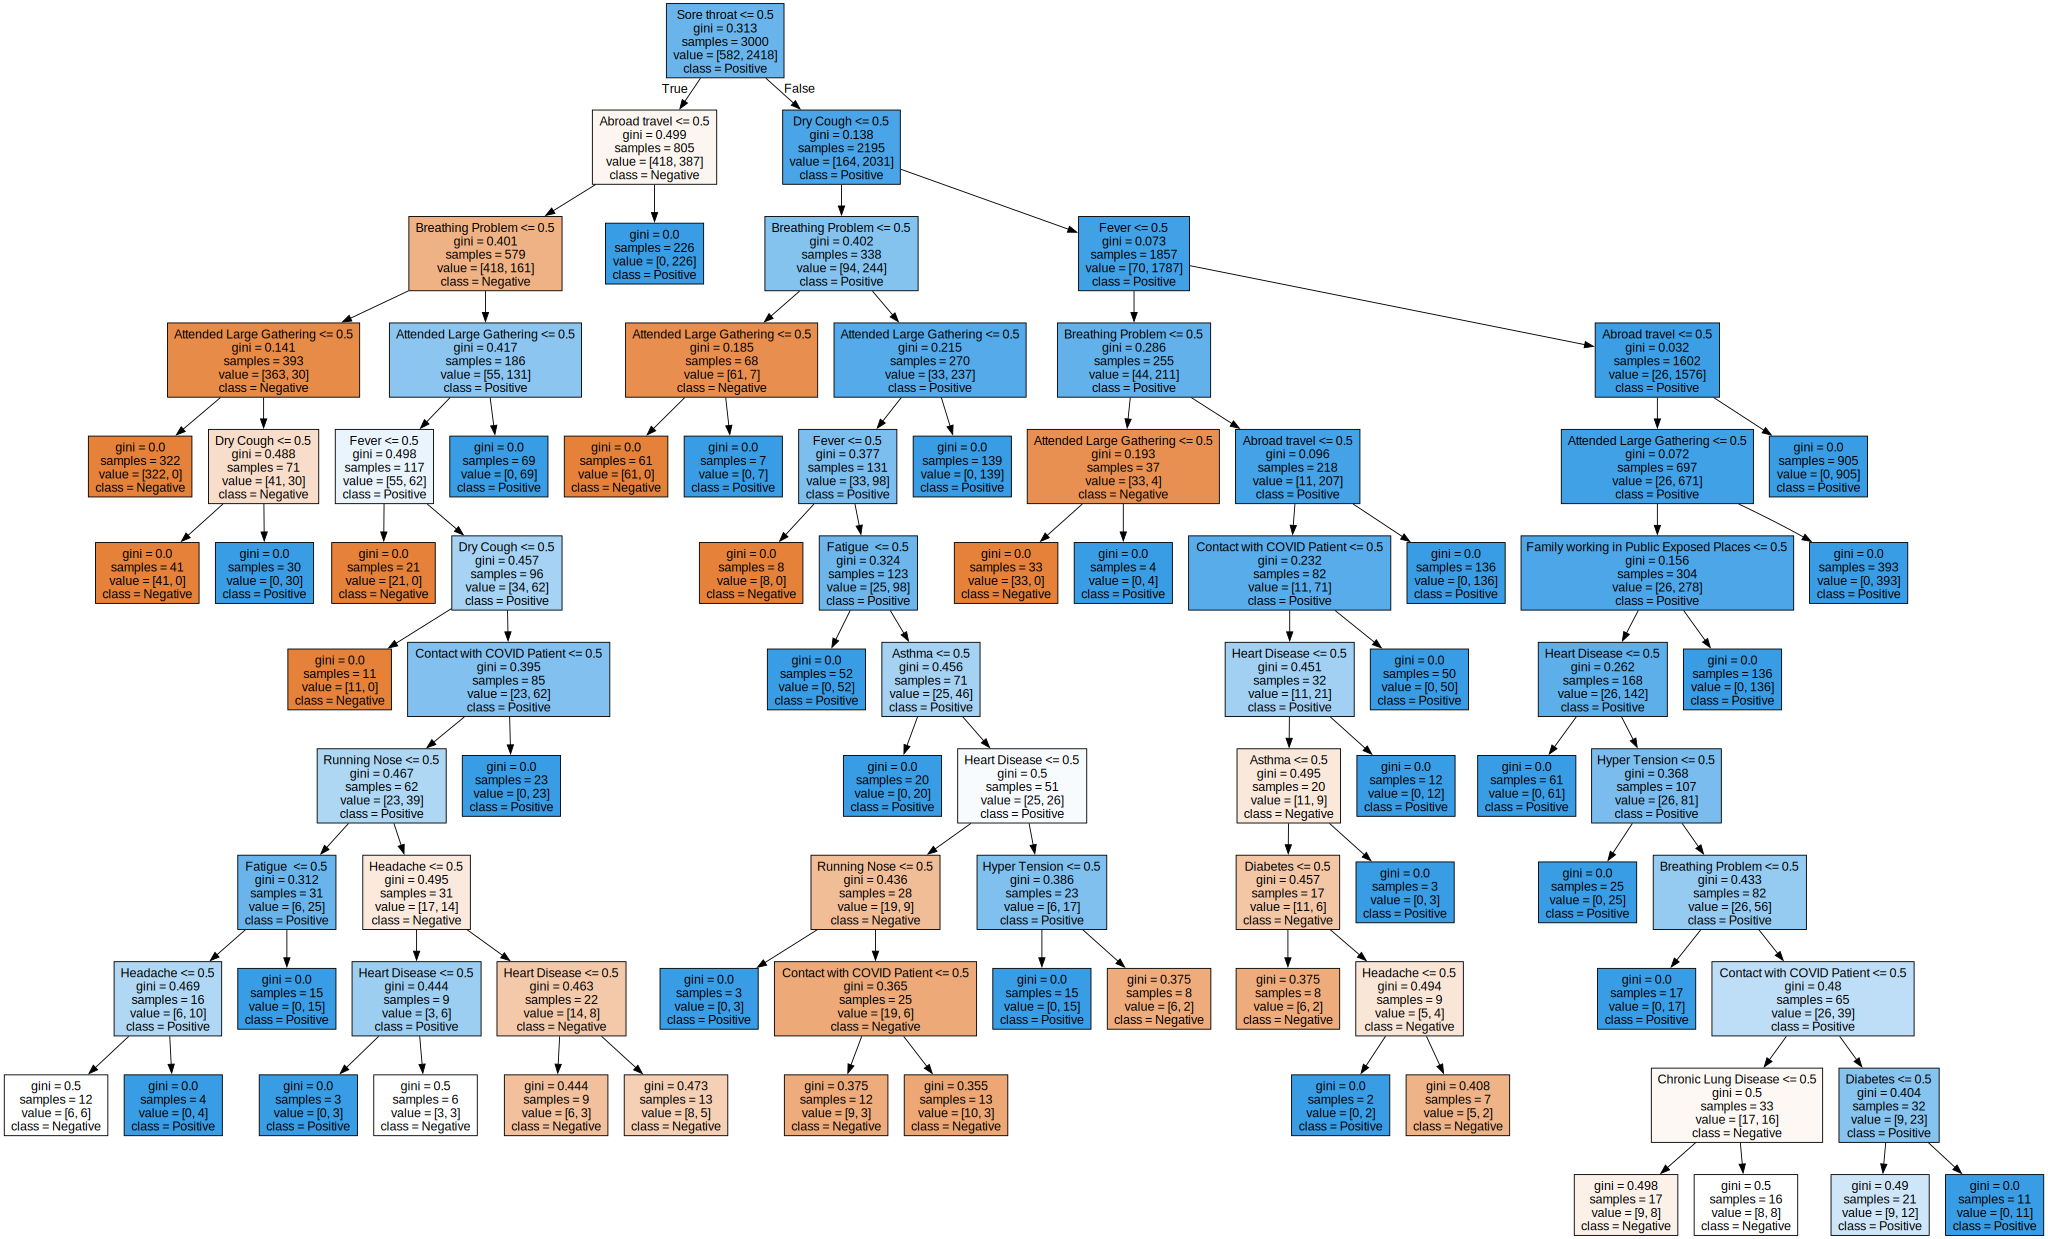

In [148]:
# collect more features

df = pd.read_csv("Covid Dataset.csv")
print(len(df.columns), df.columns)
large_test_dataset = df.sample(1000, random_state=0)
large_test_gt = large_test_dataset['COVID-19']
large_test_dataset = large_test_dataset.drop(columns=['COVID-19'])
rest_df = df.drop(index=large_test_dataset.index)
large_train_dataset = rest_df.sample(3000, random_state=0)
large_train_gt = large_train_dataset['COVID-19'].replace(['Yes', 'No'], [1, 0])
large_train_dataset = large_train_dataset.drop(columns=['COVID-19'])
large_train_dataset = large_train_dataset.replace(['Yes', 'No'], [1, 0])
large_test_dataset = large_test_dataset.replace(['Yes', 'No'], [1, 0])
large_test_gt = large_test_gt.replace(['Yes', 'No'], [1, 0])

DT.fit(large_train_dataset,large_train_gt)

y_pred = DT.predict(large_test_dataset)

print("large train accuracy:", DT.score(large_train_dataset, large_train_gt))
print("large test accuracy:", DT.score(large_test_dataset, large_test_gt))

Target = ['Negative','Positive']

# DOT data
DTRep = tree.export_graphviz(DT, out_file=None, 
                                feature_names= large_train_dataset.columns,
                                class_names= Target,
                                filled=True)

# Draw graph
DTgraphmax = graphviz.Source(DTRep, format="png") 
DTgraphmax